### Student Information
Name: 鄭勝偉

Student ID: 112065524

GitHub ID: victor890915

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1 takehomes


In [112]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups



# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train',categories=categories)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [113]:
#Answer here
X.where(X['category']>1)

,text,category,category_name
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3.0,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3.0,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3.0,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2.0,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2.0,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2.0,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2.0,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [114]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [115]:
# Answer here
'''
entey two contains the string "NaN" so its not null

same with entry three, which contaion the strig "None"

entry five contians a empty string, but empty string still counts as an real object, therefore its not null
'''

'\nentey two contains the string "NaN" so its not null\n\nsame with entry three, which contaion the strig "None"\n\nentry five contians a empty string, but empty string still counts as an real object, therefore its not null\n'

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [116]:
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample[0:100]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1340,From: nash@biologysx.lan.nrc.ca (John Nash) Su...,2,sci.med
965,From: jbrown@batman.bmd.trw.com Subject: Re: D...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
845,From: ktt3@unix.brighton.ac.uk (Koon Tang) Sub...,1,comp.graphics


In [117]:
# Answer here
'''
the indexing of X_sample is also randomly sampled, meaning that the order of data is also altered.
also, same random_state numbers have exactly same sample results. 
'''


'\nthe indexing of X_sample is also randomly sampled, meaning that the order of data is also altered.\nalso, same random_state numbers have exactly same sample results. \n'

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category Distribution'}, xlabel='category'>

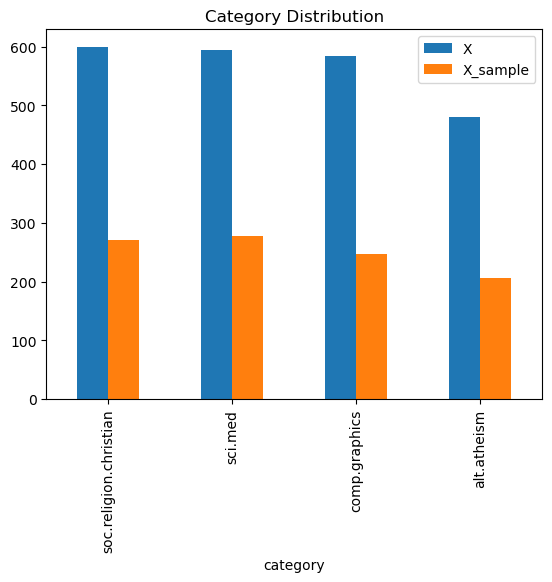

In [118]:

df = pd.DataFrame({'category': ["soc.religion.christian", "sci.med","comp.graphics","alt.atheism"],
                  "X": [X['category_name'].value_counts()["soc.religion.christian"],X['category_name'].value_counts()["sci.med"],X['category_name'].value_counts()["comp.graphics"],X['category_name'].value_counts()["alt.atheism"]],
                  "X_sample": [X_sample['category_name'].value_counts()["soc.religion.christian"],X_sample['category_name'].value_counts()["sci.med"],X_sample['category_name'].value_counts()["comp.graphics"],X_sample['category_name'].value_counts()["alt.atheism"]]})

df.plot(x = "category", y=["X","X_sample"],kind="bar",title="Category Distribution")

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()


In [120]:
# Answer here

entryFive = X_counts[4, 0:100].toarray()
for i in range(1,100):
    if (entryFive[0,i] != 0):
        target = i
        break
count_vect.get_feature_names_out()[target]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

100%|██████████| 35788/35788 [00:00<00:00, 1995052.45it/s]


5313


see any words other than pure alphabat as stopwords and exclude them in the count vectorizer


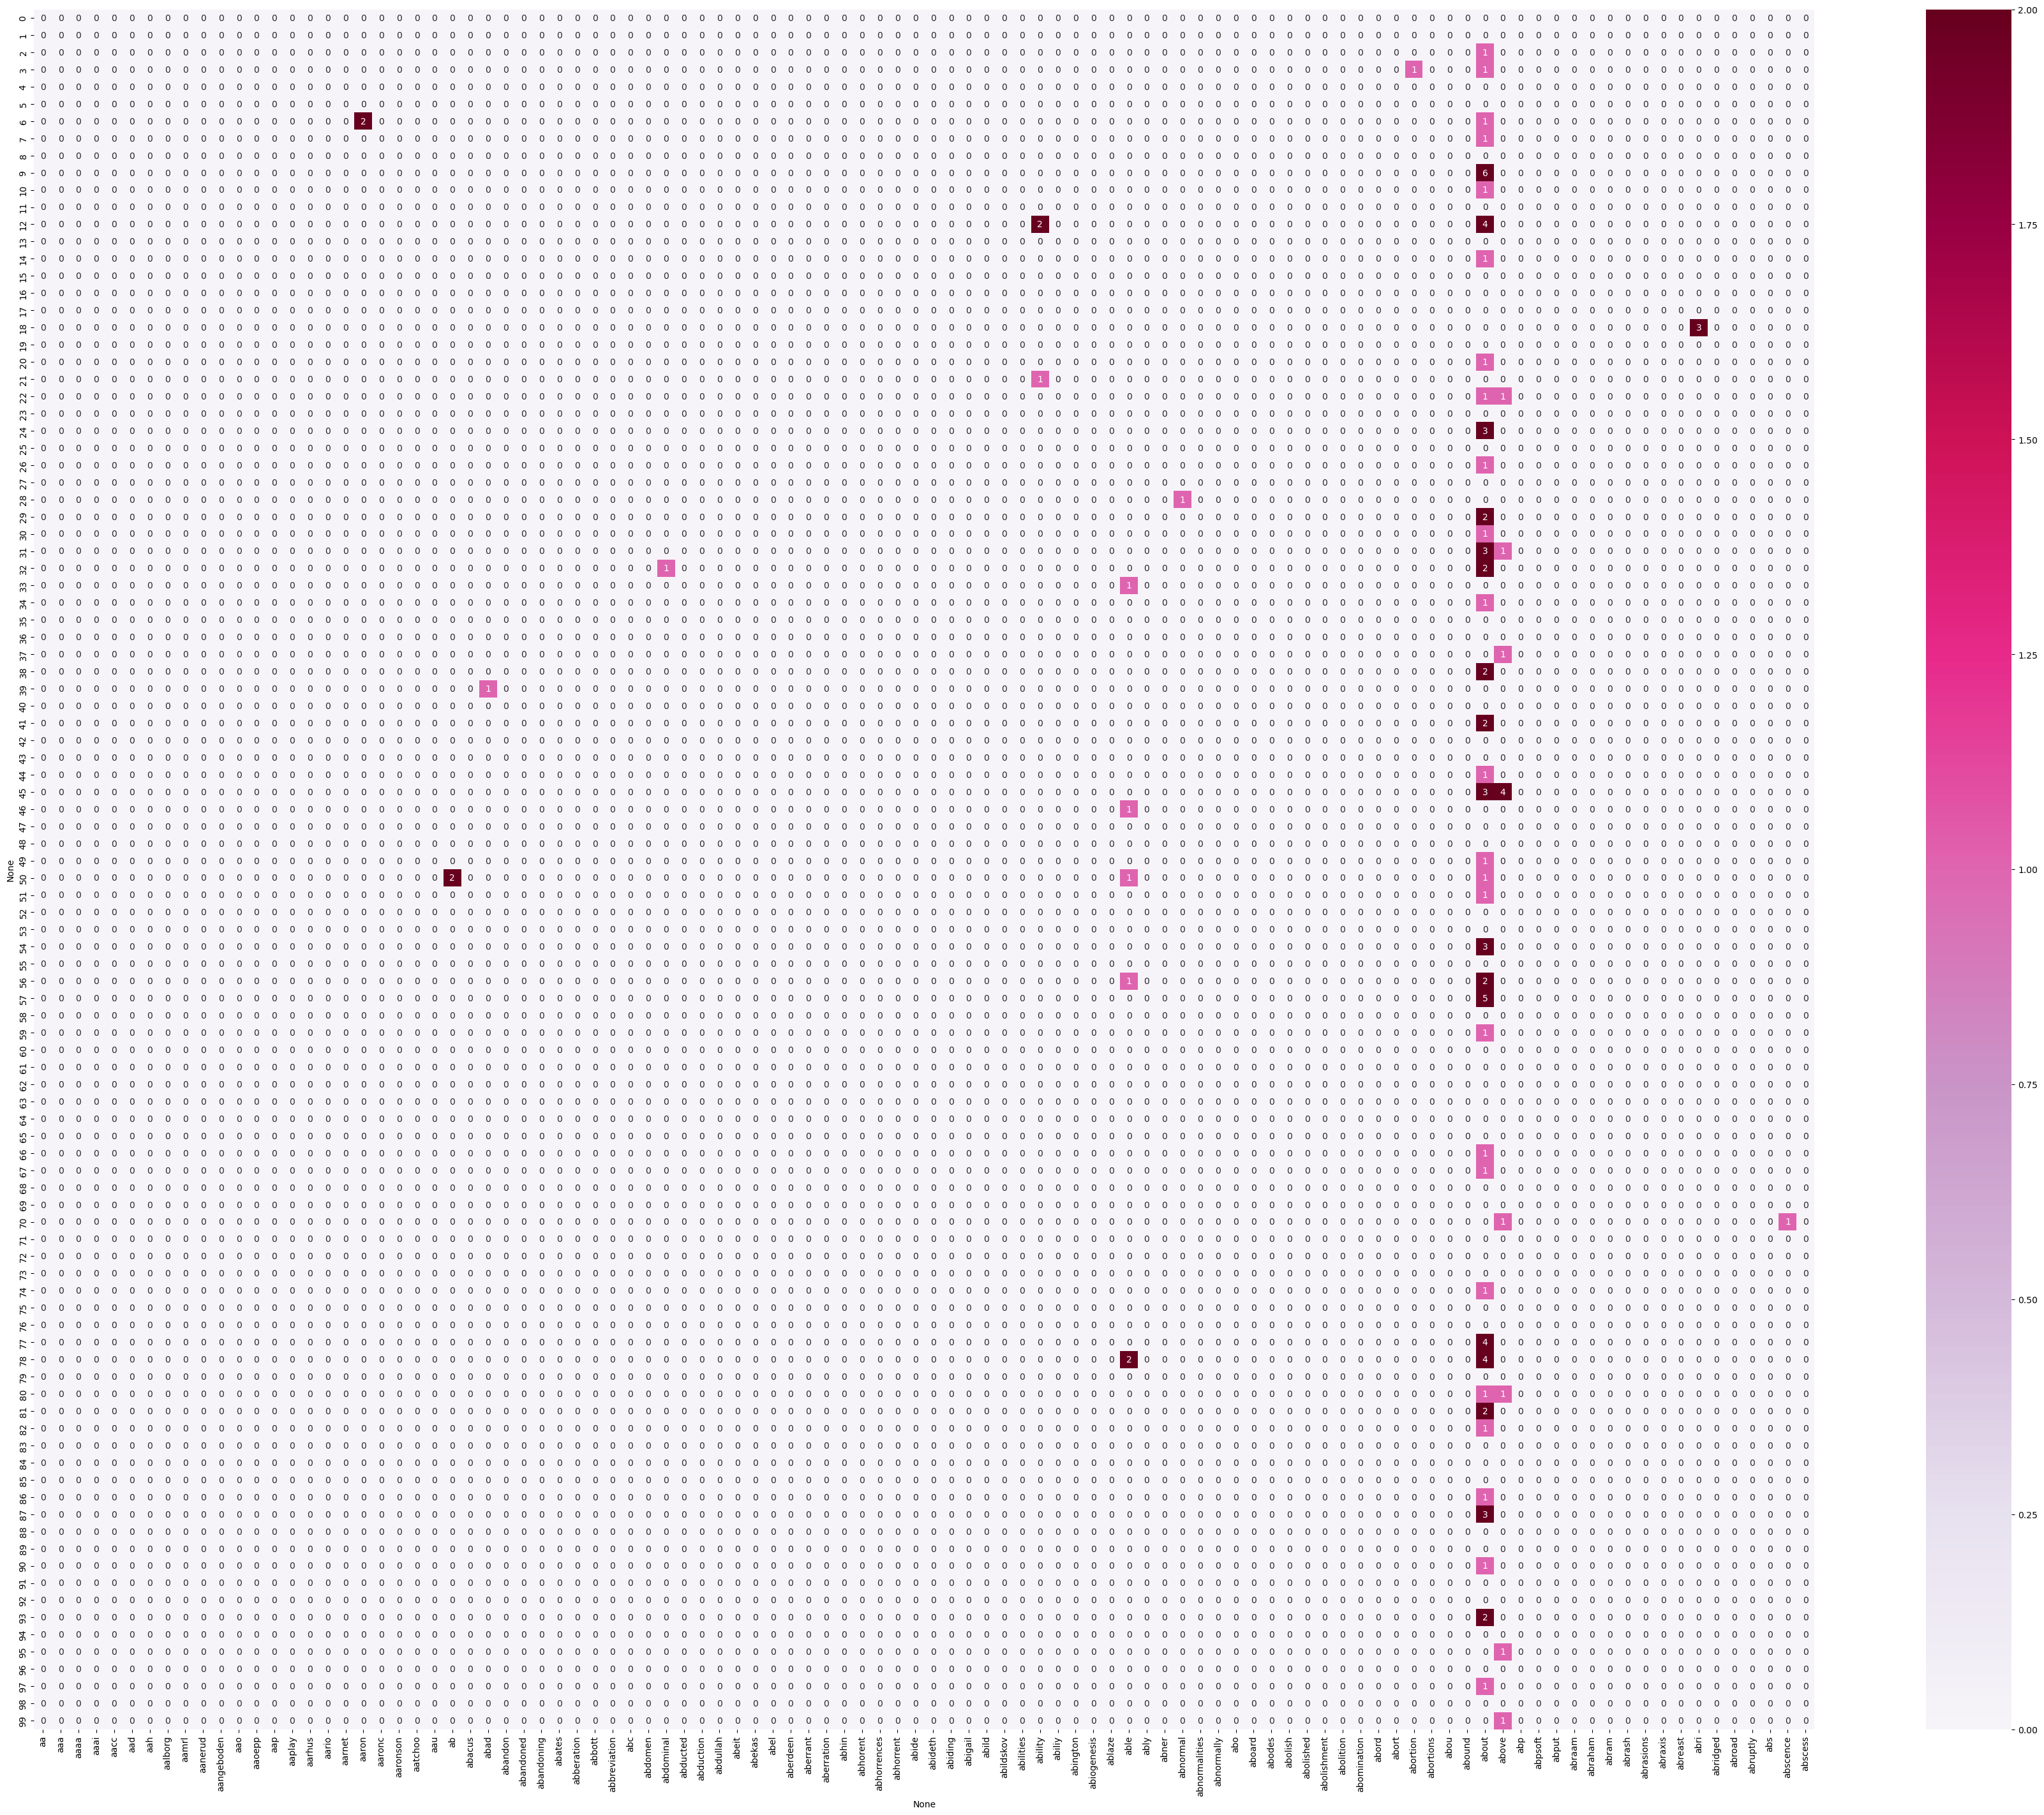

In [121]:
# Answer here
import seaborn as sns
from tqdm import tqdm

numberStopwords = []

for words in tqdm(count_vect.get_feature_names_out()):
    if(not words.isalpha()):
        numberStopwords.append(words)

print(len(numberStopwords))


count_vect_with_stopwords = CountVectorizer(stop_words=numberStopwords)

scope = 100
figSize = scope/20
X_counts_with_stopwords = count_vect_with_stopwords.fit_transform(X.text)

plot_x_ex = [count_vect_with_stopwords.get_feature_names_out()[0:scope]]
plot_y_ex = [X.index[0:scope]]
plot_z_ex = X_counts_with_stopwords[0:scope, 0:scope].toarray()

df_todraw_ex = pd.DataFrame(plot_z_ex, columns = plot_x_ex, index = plot_y_ex)

print("see any words other than pure alphabat as stopwords and exclude them in the count vectorizer")

plt.subplots(figsize=(9*figSize, 7*figSize))
ax = sns.heatmap(df_todraw_ex,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

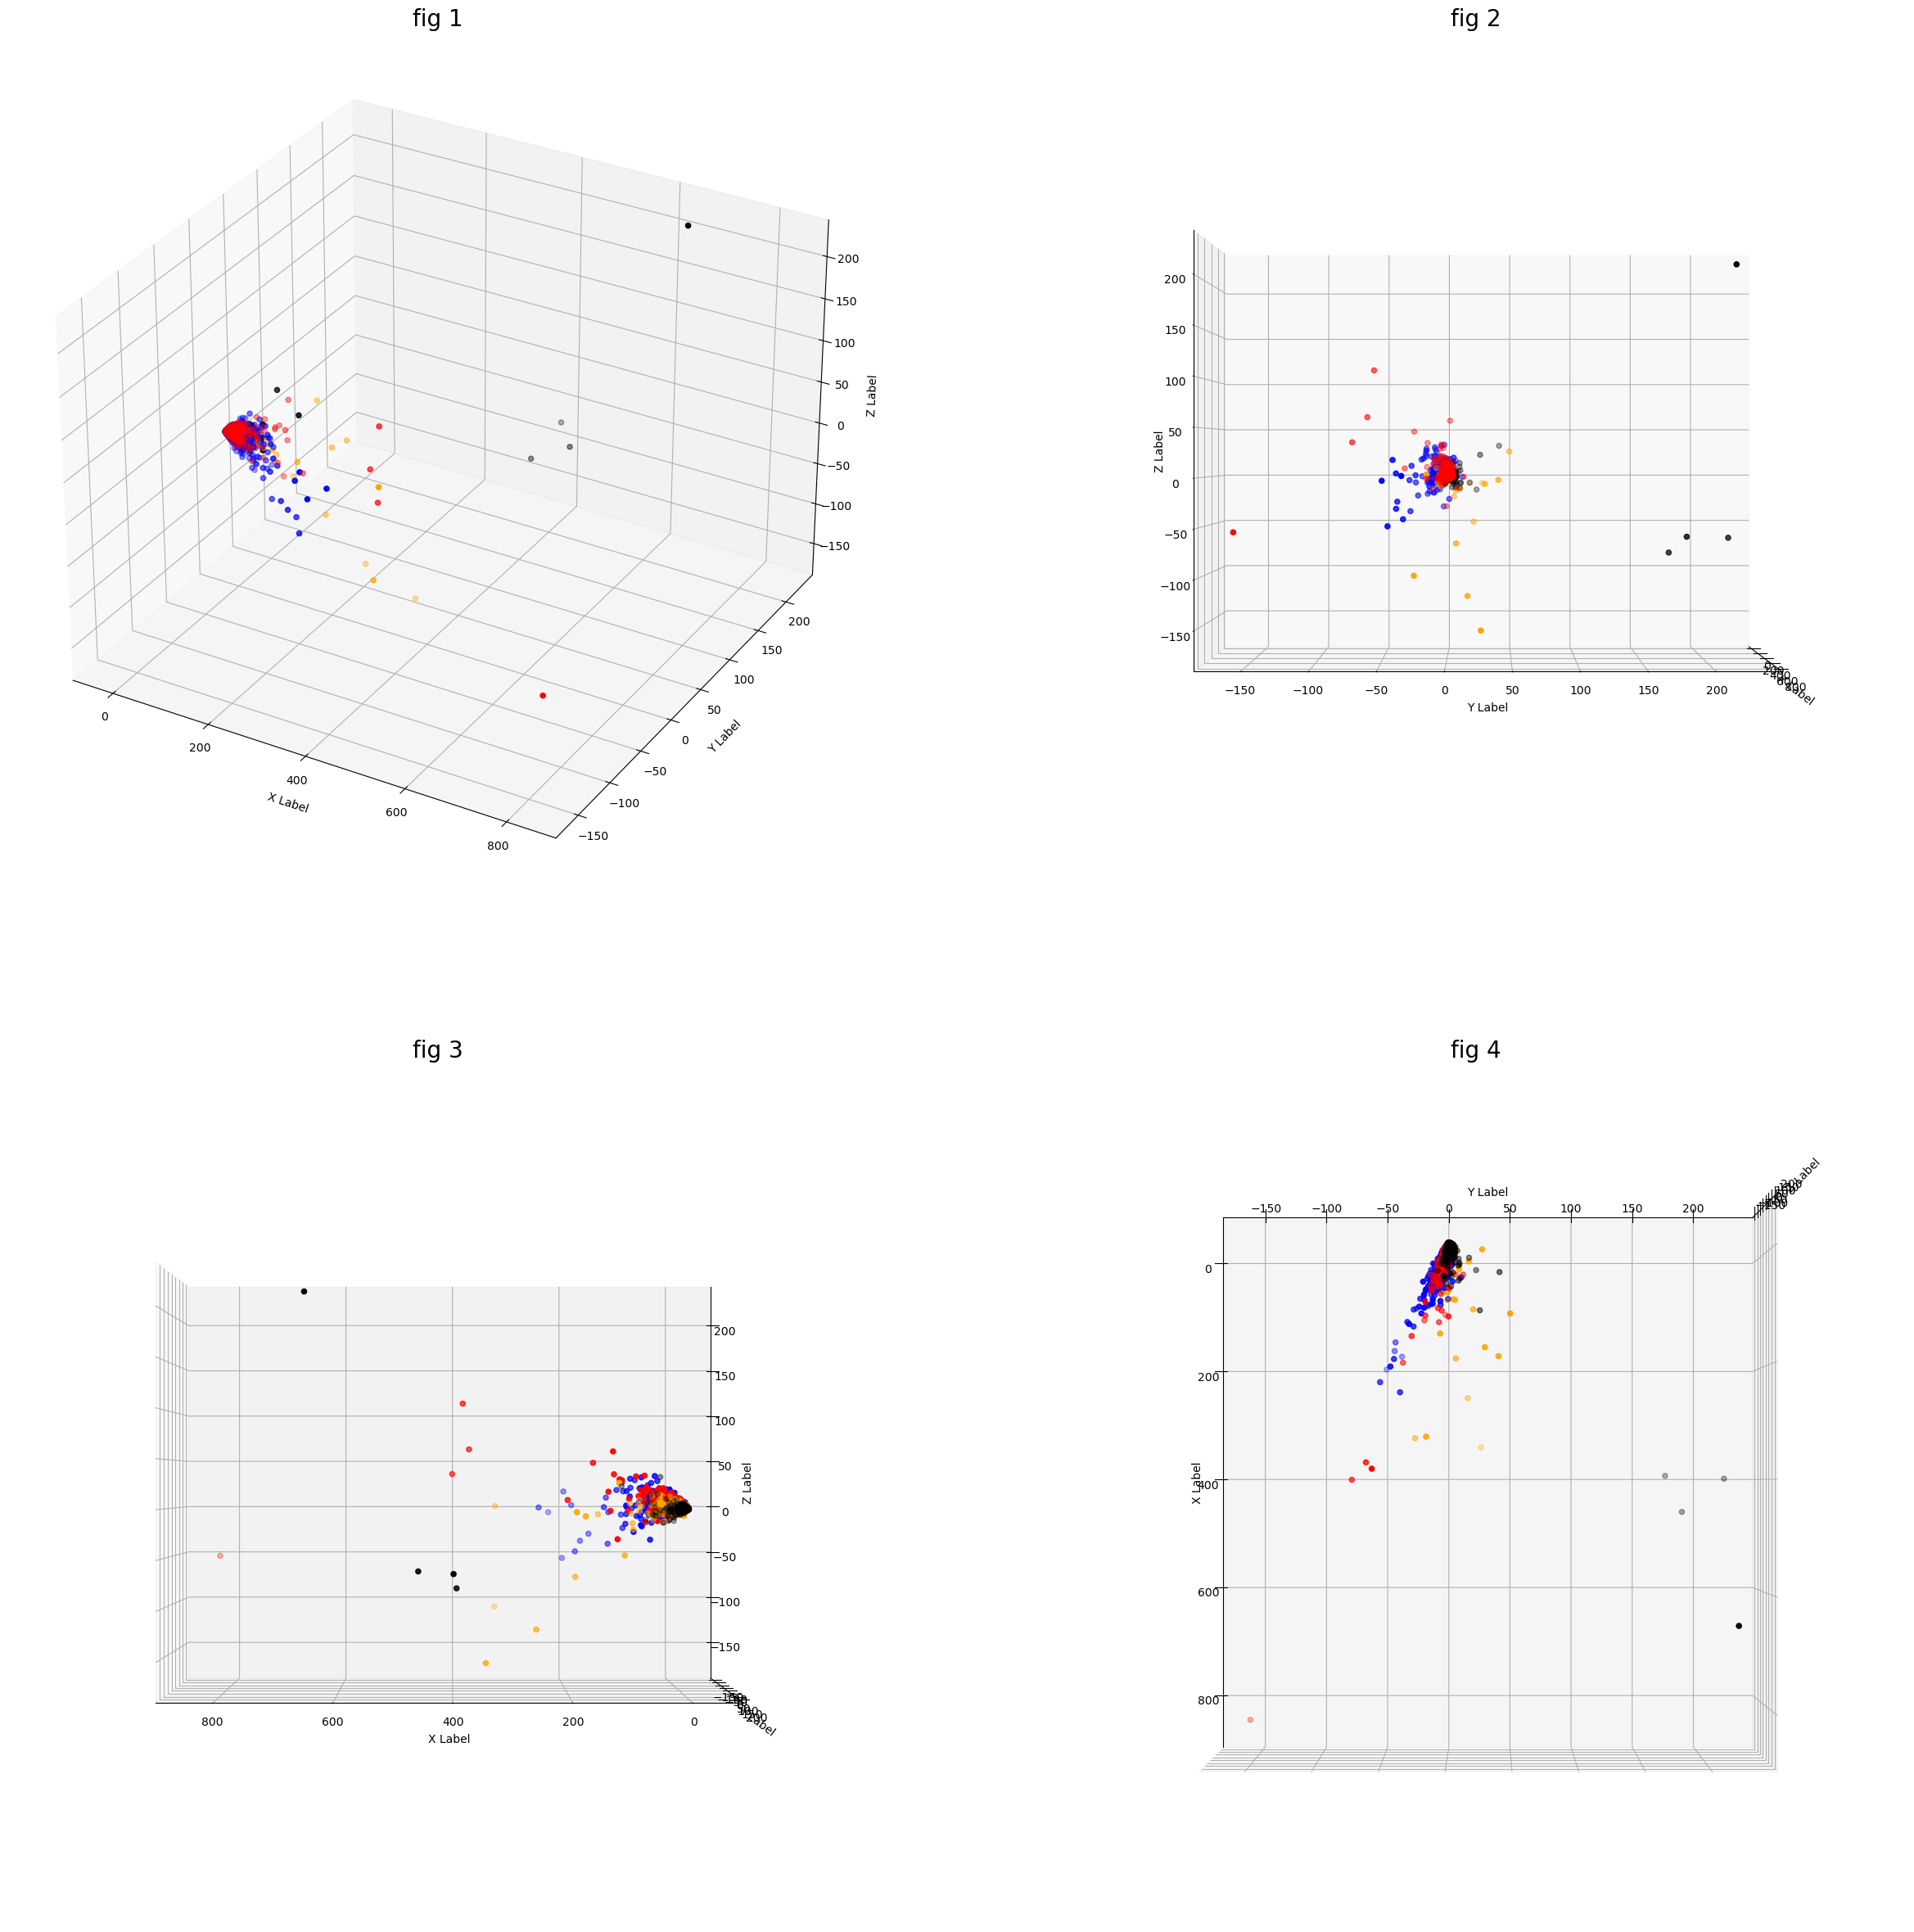

In [122]:
# Answer here
from sklearn.decomposition import PCA
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['red', 'blue', 'black', 'orange']


# plot

fig = plt.figure(figsize=(30, 30))
ax1 = plt.subplot(221, projection='3d')
ax2 = plt.subplot(222, projection='3d')
ax3 = plt.subplot(223, projection='3d')
ax4 = plt.subplot(224, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    ax4.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.set_title('fig 1', fontsize=20)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.set_title('fig 2', fontsize=20)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.set_title('fig 3', fontsize=20)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.set_title('fig 4', fontsize=20)

ax2.view_init(elev=0,azim=0)
ax3.view_init(elev=0,azim=90)
ax4.view_init(elev=90,azim=0)


#ax.view_init(elev=30, azim=45, roll=15)

plt.show()

fig 1 is just an overview and shows the overall distribution of the datapoints

in the midle part of fig 2, and fig 3  we can see that most of the orange(sci.med) datapoints have larger X label value than black(comp.graphics) datapoints (except for some outliers) meaning that the x value could be a good indicator for those two labels

from fig 2 we can tell that blue(soc.religion.christian) tend to have negitave y value

from fig 4 there seems to be a linear relationship for value x and y in blue and red category.

also, black datapoints tend to have the smallest x value.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [123]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [124]:
# Answer here
reduced_feature_names = count_vect.get_feature_names_out()[:300]
reduced_feature_frequencies = term_frequencies[:300]

indexToDelete = []

#remove word tokens that only appears less then five times 

for i in range(len(count_vect.get_feature_names_out()[:300])):
    if(reduced_feature_frequencies[i] < 5):
        indexToDelete.append(i)

reduced_feature_names = np.delete(reduced_feature_names, indexToDelete)
reduced_feature_frequencies = np.delete(reduced_feature_frequencies, indexToDelete)


fig = px.bar(x=reduced_feature_names, y=reduced_feature_frequencies)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [125]:
# Answer here

#zipped the token and its frequency together and sorted it by frequency
#then plot the new sorted data

freq_word = zip(term_frequencies[:300].tolist(),count_vect.get_feature_names_out()[:300].tolist())
freq_word = sorted(freq_word, reverse= True)
fig = px.bar(x=[word for _,word in freq_word] , y=[freq for freq,_ in freq_word])
fig.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [126]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [127]:
# Answer here
mlb_ex = preprocessing.LabelBinarizer()
mlb_ex.fit(X.category_name)
X['bin_name_category'] = mlb_ex.transform(X['category_name']).tolist()
X[0:9]


#yes, it works exactly the same as using the category 

,text,category,category_name,bin_category,bin_name_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


# Part 2 New Dataset

## 1. The data

## 2. Data Preparation

## 3. Data Transformation

In [128]:
### Begin Assignment Here
import pandas as pd


##importing all three datasets and save it into a dataframe

data1 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
data1.columns = ["text", "score"]

data2 = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
data2.columns = ["text", "score"]

data3 = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
data3.columns = ["text", "score"]

data = pd.concat([data1, data2, data3], axis = 0)

print(len(data))

2748


In [129]:
#there seems to be a bug when showing the index in the dataframe 
#the index shown is wrong after the 1000th(999) entry 
#further experiments done in the following blocks of code
data[10:100]
##the first 10 to 100 is correct

,text,score
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
12,If the two were seperated by a mere 5+ ft I st...,0
13,Very good quality though,1
14,"The design is very odd, as the ear ""clip"" is n...",0
...,...,...
95,Will order from them again!,1
96,If you plan to use this in a car forget about it.,0
97,I found this product to be waaay too big.,0
98,Best I've found so far .... I've tried 2 other...,1


In [130]:
data[999: 1002]
#data[1000] is labeled as index = 0 

,text,score
999,"You can not answer calls with the unit, never ...",0
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0


In [131]:
data[1999:2002]
#issue still exists data[2000] is labeles as index = 252

,text,score
251,There is nothing privileged about working/eati...,0
252,The Greek dressing was very creamy and flavorful.,1
253,"Overall, I don't think that I would take my pa...",0


In [132]:
# I manually put three data sources into one single txt file and import it
data_all_three = pd.read_csv('sentiment labelled sentences/all_three.txt', sep="\t", header=None)
data_all_three.columns = ["text", "score"]
print(len(data_all_three))

2748


In [133]:
data_all_three[-10:]

,text,score
2738,"The opening sequence of this gem is a classic,...",1
2739,Fans of the genre will be in heaven.,1
2740,Lange had become a great actress.,1
2741,It looked like a wonderful story.,1
2742,I never walked out of a movie faster.,0
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0
2747,All in all its an insult to one's intelligence...,0


In [134]:
##the index seems to be correct, therefore we use this dataframe instead
data = data_all_three

In [135]:
len(data)

2748

In [136]:
data[0:2]

,text,score
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [137]:
for t in data["text"][:3]:
    print(t)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.


In [138]:
# adding review lable

def getReview(score):
    if score:
        return "good"
    else:
        return "bad"

data["review"] = data.score.apply(lambda r: getReview(r))

In [139]:
data[0:10]

,text,score,review
0,Wow... Loved this place.,1,good
1,Crust is not good.,0,bad
2,Not tasty and the texture was just nasty.,0,bad
3,Stopped by during the late May bank holiday of...,1,good
4,The selection on the menu was great and so wer...,1,good
5,Now I am getting angry and I want my damn pho.,0,bad
6,Honeslty it didn't taste THAT fresh.),0,bad
7,The potatoes were like rubber and you could te...,0,bad
8,The fries were great too.,1,good
9,A great touch.,1,good


In [140]:
# a simple query
data[:10][["text","review"]]

,text,review
0,Wow... Loved this place.,good
1,Crust is not good.,bad
2,Not tasty and the texture was just nasty.,bad
3,Stopped by during the late May bank holiday of...,good
4,The selection on the menu was great and so wer...,good
5,Now I am getting angry and I want my damn pho.,bad
6,Honeslty it didn't taste THAT fresh.),bad
7,The potatoes were like rubber and you could te...,bad
8,The fries were great too.,good
9,A great touch.,good


In [225]:
#### Let's query the last 10 records
data[-10:]

,text,score,review,unigrams,bin_review
2738,"The opening sequence of this gem is a classic,...",1,good,"[The, opening, sequence, of, this, gem, is, a,...",[1]
2739,Fans of the genre will be in heaven.,1,good,"[Fans, of, the, genre, will, be, in, heaven, .]",[1]
2740,Lange had become a great actress.,1,good,"[Lange, had, become, a, great, actress, .]",[1]
2741,It looked like a wonderful story.,1,good,"[It, looked, like, a, wonderful, story, .]",[1]
2742,I never walked out of a movie faster.,0,bad,"[I, never, walked, out, of, a, movie, faster, .]",[0]
2743,I just got bored watching Jessice Lange take h...,0,bad,"[I, just, got, bored, watching, Jessice, Lange...",[0]
2744,"Unfortunately, any virtue in this film's produ...",0,bad,"[Unfortunately, ,, any, virtue, in, this, film...",[0]
2745,"In a word, it is embarrassing.",0,bad,"[In, a, word, ,, it, is, embarrassing, .]",[0]
2746,Exceptionally bad!,0,bad,"[Exceptionally, bad, !]",[0]
2747,All in all its an insult to one's intelligence...,0,bad,"[All, in, all, its, an, insult, to, one, 's, i...",[0]


In [142]:
# using loc (by label)
data.loc[:10, 'text']

0                              Wow... Loved this place.
1                                    Crust is not good.
2             Not tasty and the texture was just nasty.
3     Stopped by during the late May bank holiday of...
4     The selection on the menu was great and so wer...
5        Now I am getting angry and I want my damn pho.
6                 Honeslty it didn't taste THAT fresh.)
7     The potatoes were like rubber and you could te...
8                             The fries were great too.
9                                        A great touch.
10                             Service was very prompt.
Name: text, dtype: object

In [143]:
# using iloc (by position)
data.iloc[:10, 0]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: text, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [144]:
#Answer here
data.where(data['text']== " ")

,text,score,review
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2743,NaN,NaN,NaN
2744,NaN,NaN,NaN
2745,NaN,NaN,NaN
2746,NaN,NaN,NaN


### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```good``` category, and query every 10th record. Only show the first 5 records.

In [145]:
# Answer here

data[data["review"]== "good"].iloc[::10][:5]

,text,score,review
0,Wow... Loved this place.,1,good
23,I could care less... The interior is just beau...,1,good
40,The shrimp tender and moist.,1,good
55,"Loved it...friendly servers, great food, wonde...",1,good
70,"The deal included 5 tastings and 2 drinks, and...",1,good


## 4. Data Mining using Pandas

In [146]:
# check missing values
data.isnull()

,text,score,review
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [147]:
## checking for missing values
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,review
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [148]:
data.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [149]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "score"])

In [150]:
dummy_series

text     dummy_record
score               1
dtype: object

In [151]:
dummy_series.to_frame().T

,text,score
0,dummy_record,1


In [152]:
data_with_series = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)

In [153]:
len(data_with_series)

2749

In [154]:
data_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,review
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [155]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'score': 1
              }]

In [156]:
data = pd.concat([data,  pd.DataFrame(dummy_dict)], ignore_index=True)

In [157]:
len(data)

2749

In [158]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,review
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [159]:
data.dropna(inplace=True)

In [160]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,review
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [161]:
len(data)

2748

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [162]:
## same answer in Part 1 of assignment

In [163]:
#4.2 Dealing with Duplicate Data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [164]:
##checking for duplicate entries
sum(data.duplicated())

17

In [165]:
sum(data.duplicated('text'))

17

In [166]:
# find out where are those 17 duplicated entries were
dupe_log = data.duplicated()
duped_data = data[dupe_log == True]
print(duped_data)

                                                   text  score review
814                                  I love this place.      1   good
816                              The food was terrible.      0    bad
843                                    I won't be back.      0    bad
846                   I would not recommend this place.      0    bad
1285                                      Great phone!.      1   good
1407                                       Works great.      1   good
1524                                      Works great!.      1   good
1543                            Don't buy this product.      0    bad
1744  If you like a loud buzzing to override all you...      0    bad
1748                                      Does not fit.      0    bad
1778                              This is a great deal.      1   good
1792                                       Great Phone.      1   good
1892                   Excellent product for the price.      1   good
1896                

In [167]:
## upon human inspection the detected duplicate value is actually not duplicated,
## so this can be seen as no duplication

## 5.  Data Preprocessing

In [168]:
### 5.1 Sampling
print(data.shape)
data_sample = data.sample(n=1000,random_state=43) #random state
display(data_sample)

(2748, 3)


,text,score,review
835,I paid the bill but did not tip because I felt...,0,bad
2163,"Much more interesting, more action, more suspe...",1,good
959,The only reason to eat here would be to fill u...,0,bad
261,"I have been in more than a few bars in Vegas, ...",0,bad
2027,It is a true classic.,1,good
...,...,...,...
1499,WELL IM SATISFIED.,1,good
2567,"Personally, I think it shows that people shoul...",1,good
1175,Superb Phone on a Great Network.,1,good
853,The price is reasonable and the service is great.,1,good


In [169]:
len(data_sample)

1000

In [170]:
data_sample[0:4]

,text,score,review
835,I paid the bill but did not tip because I felt...,0,bad
2163,"Much more interesting, more action, more suspe...",1,good
959,The only reason to eat here would be to fill u...,0,bad
261,"I have been in more than a few bars in Vegas, ...",0,bad


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [171]:
## same answer in Part 1 of assignment

In [172]:
import matplotlib.pyplot as plt

review
good    1386
bad     1362
Name: count, dtype: int64


<Axes: title={'center': 'review distribution'}, xlabel='review'>

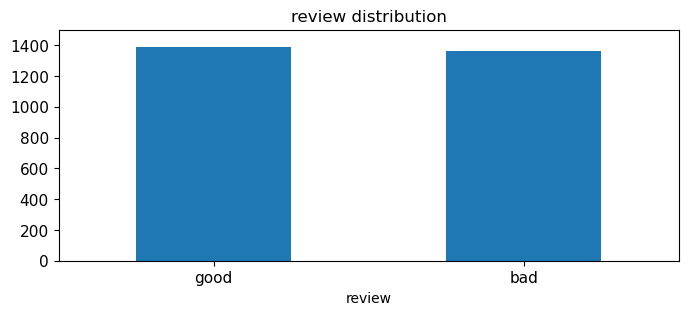

In [173]:
#plot the distribution of good and bad reviews
print(data.review.value_counts())


data.review.value_counts().plot(kind = 'bar',
                                    title = 'review distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

review
bad     521
good    479
Name: count, dtype: int64


<Axes: title={'center': 'review distribution'}, xlabel='review'>

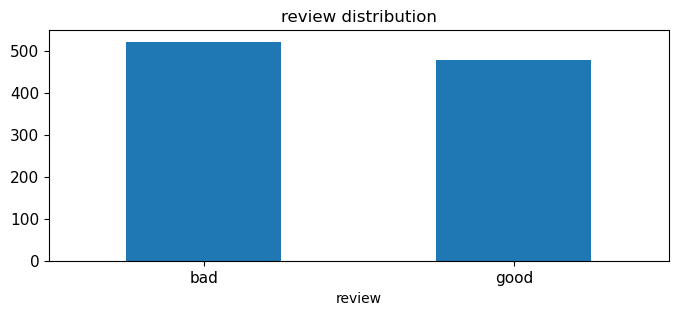

In [174]:
#plot the distribution of sampled  good and bad reviews
print(data_sample.review.value_counts())


data_sample.review.value_counts().plot(kind = 'bar',
                                    title = 'review distribution',
                                    ylim = [0, 550],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'review distribution'}, xlabel='review'>

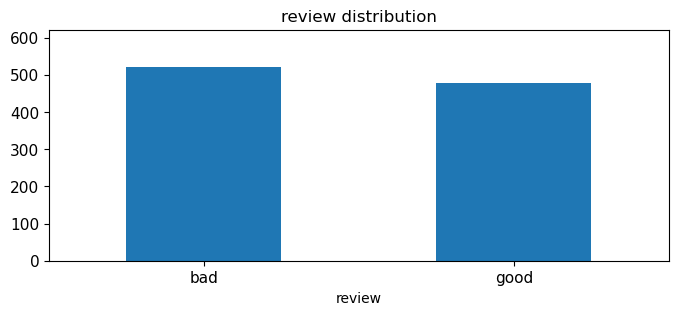

In [175]:

upper_bound = max(data_sample.review.value_counts() + 100)

data_sample.review.value_counts().plot(kind = 'bar',
                                    title = 'review distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Review Distribution'}, xlabel='review'>

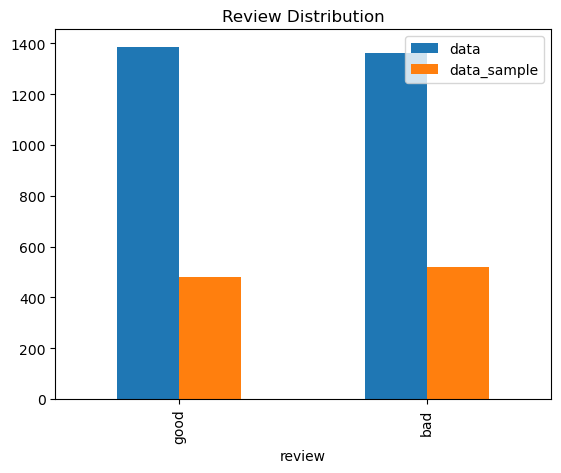

In [176]:
# Answer here
import matplotlib.pyplot as plt

df = pd.DataFrame({'review': ["good", "bad"],
                  "data": [data['review'].value_counts()['good'],data['review'].value_counts()['bad']],
                  "data_sample": [data_sample['review'].value_counts()['good'],data_sample['review'].value_counts()['bad']]})

df.plot(x = "review", y=["data","data_sample"],kind="bar",title="Review Distribution")

In [177]:
### 5.2 Feature Creation

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victor890915/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [178]:
#create unigrams for text

data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))

In [179]:
data[0:4]['unigrams']

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [180]:
data[0:4]

,text,score,review,unigrams
0,Wow... Loved this place.,1,good,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,bad,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,bad,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,good,"[Stopped, by, during, the, late, May, bank, ho..."


In [181]:
list(data[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [182]:
### 5.3 Feature subset selection

from sklearn.feature_extraction.text import CountVectorizer

#learn the vocabulary and return document-term matrix

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)

print(data_counts.shape)
print(data_counts[0])

(2748, 5155)
  (0, 5112)	1
  (0, 2711)	1
  (0, 4558)	1
  (0, 3351)	1


In [183]:
count_vect.get_feature_names_out()[69]

'aailiyah'

In [184]:
count_vect.get_feature_names_out()[696]

'cardellini'

In [185]:
analyze = count_vect.build_analyzer()


In [186]:
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [187]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(data.text[0])

['wow', 'loved', 'this', 'place']

In [188]:
analyze(" ".join(list(data[:1].text)))

['wow', 'loved', 'this', 'place']

In [189]:
# We can check the shape of this matrix by:
data_counts.shape

(2748, 5155)

In [190]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [191]:
# we convert from sparse array to normal array
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [192]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [193]:
#Answer here 
# the first five entries are all zero, so the setting of this exercise is unusable

In [194]:
# first twenty features for example heat map
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [195]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in data.index[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [196]:
plot_z = data_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


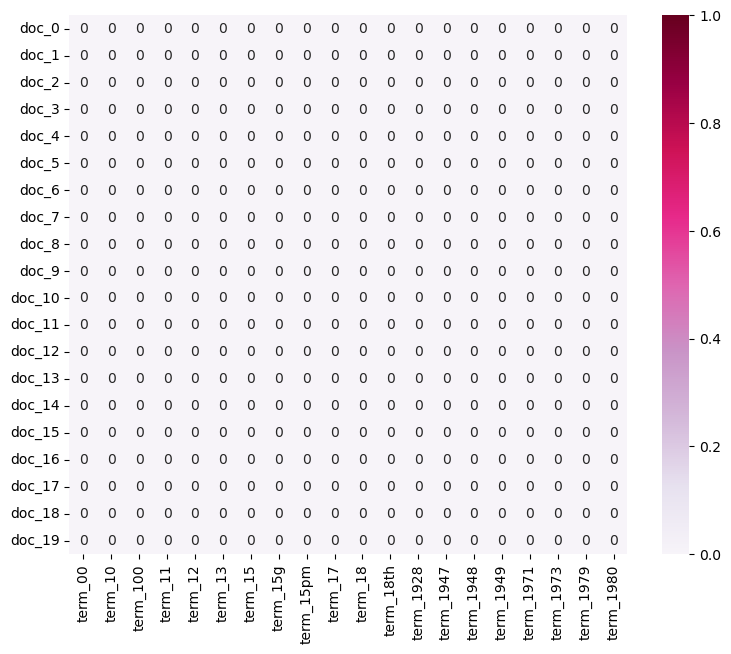

In [197]:
##drawing example heat map

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

100%|██████████| 5155/5155 [00:00<00:00, 1969721.88it/s]


96
see any words other than pure alphabat as stopwords and exclude them in the count vectorizer


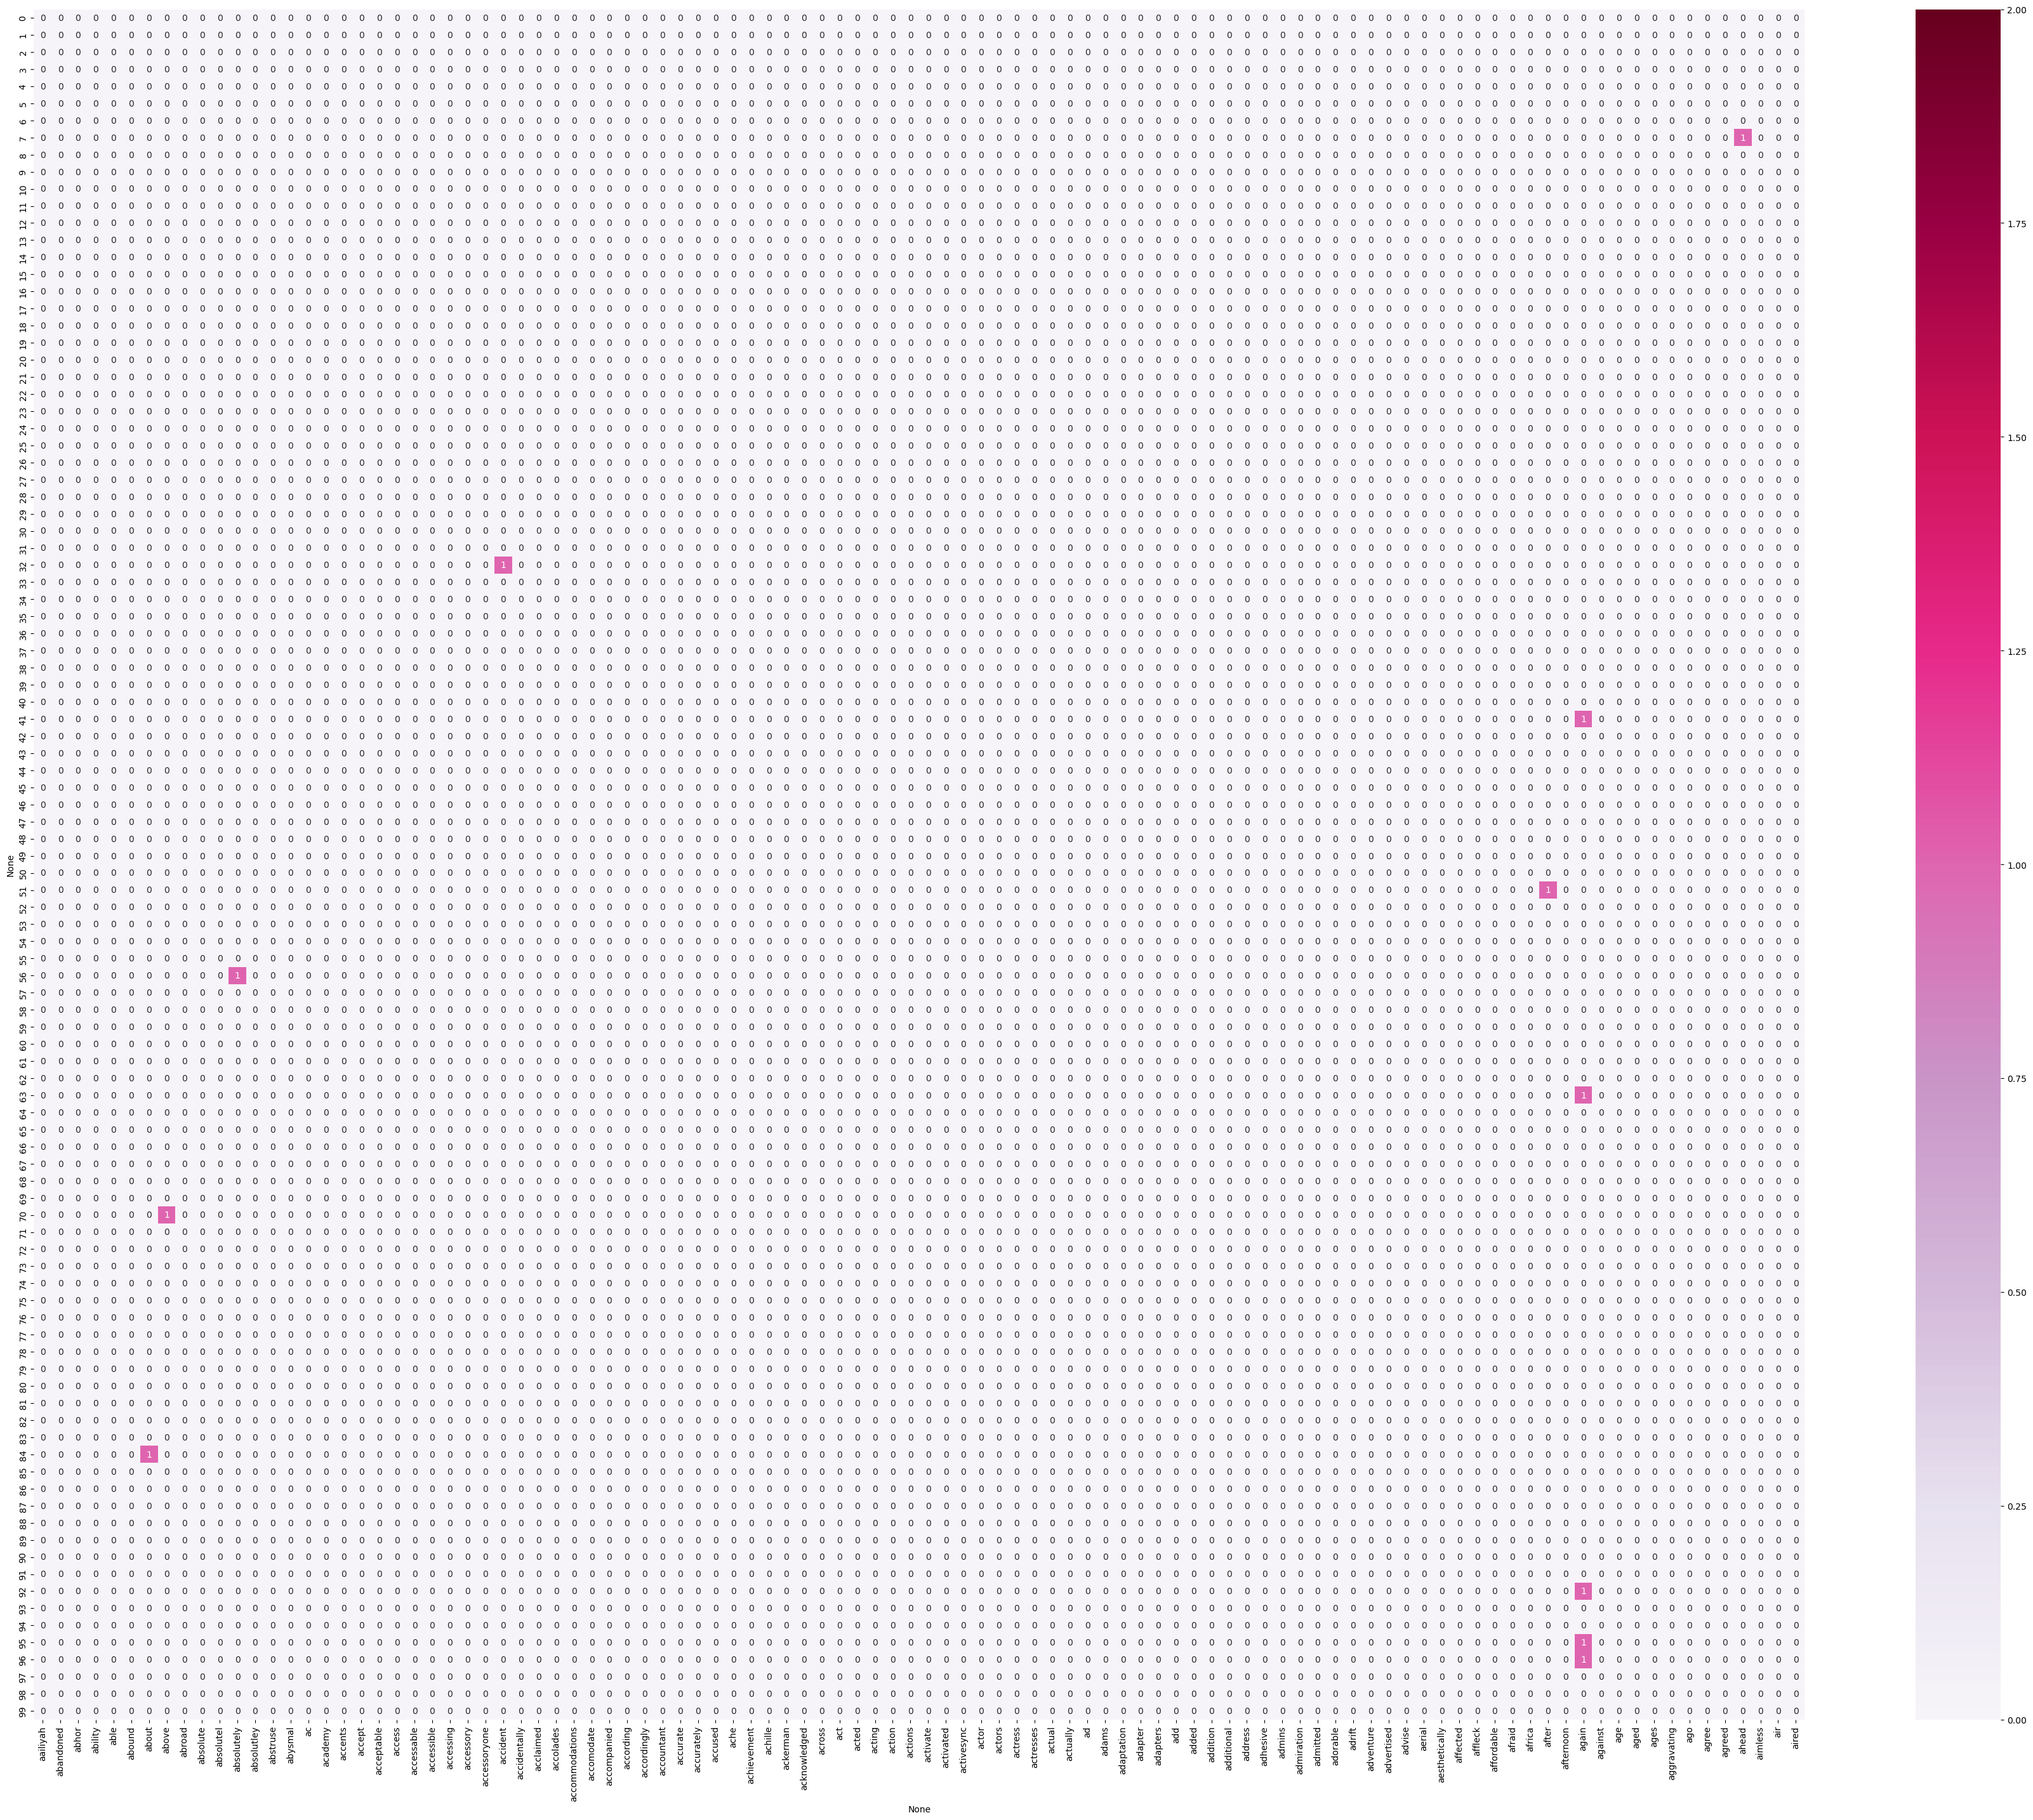

In [198]:
# Answer here
import seaborn as sns
from tqdm import tqdm

numberStopwords = []

for words in tqdm(count_vect.get_feature_names_out()):
    if(not words.isalpha()):
        numberStopwords.append(words)

print(len(numberStopwords))


count_vect_with_stopwords = CountVectorizer(stop_words=numberStopwords)

scope = 100
figSize = scope/20
data_counts_with_stopwords = count_vect_with_stopwords.fit_transform(data.text)

plot_x_ex = [count_vect_with_stopwords.get_feature_names_out()[0:scope]]
plot_y_ex = [data.index[0:scope]]
plot_z_ex = data_counts_with_stopwords[0:scope, 0:scope].toarray()

df_todraw_ex = pd.DataFrame(plot_z_ex, columns = plot_x_ex, index = plot_y_ex)

print("see any words other than pure alphabat as stopwords and exclude them in the count vectorizer")

plt.subplots(figsize=(9*figSize, 7*figSize))
ax = sns.heatmap(df_todraw_ex,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

In [199]:
### 5.4 Dimensionality Reduction

from sklearn.decomposition import PCA

print(data_counts.shape)
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2748, 5155)
(2748, 2)


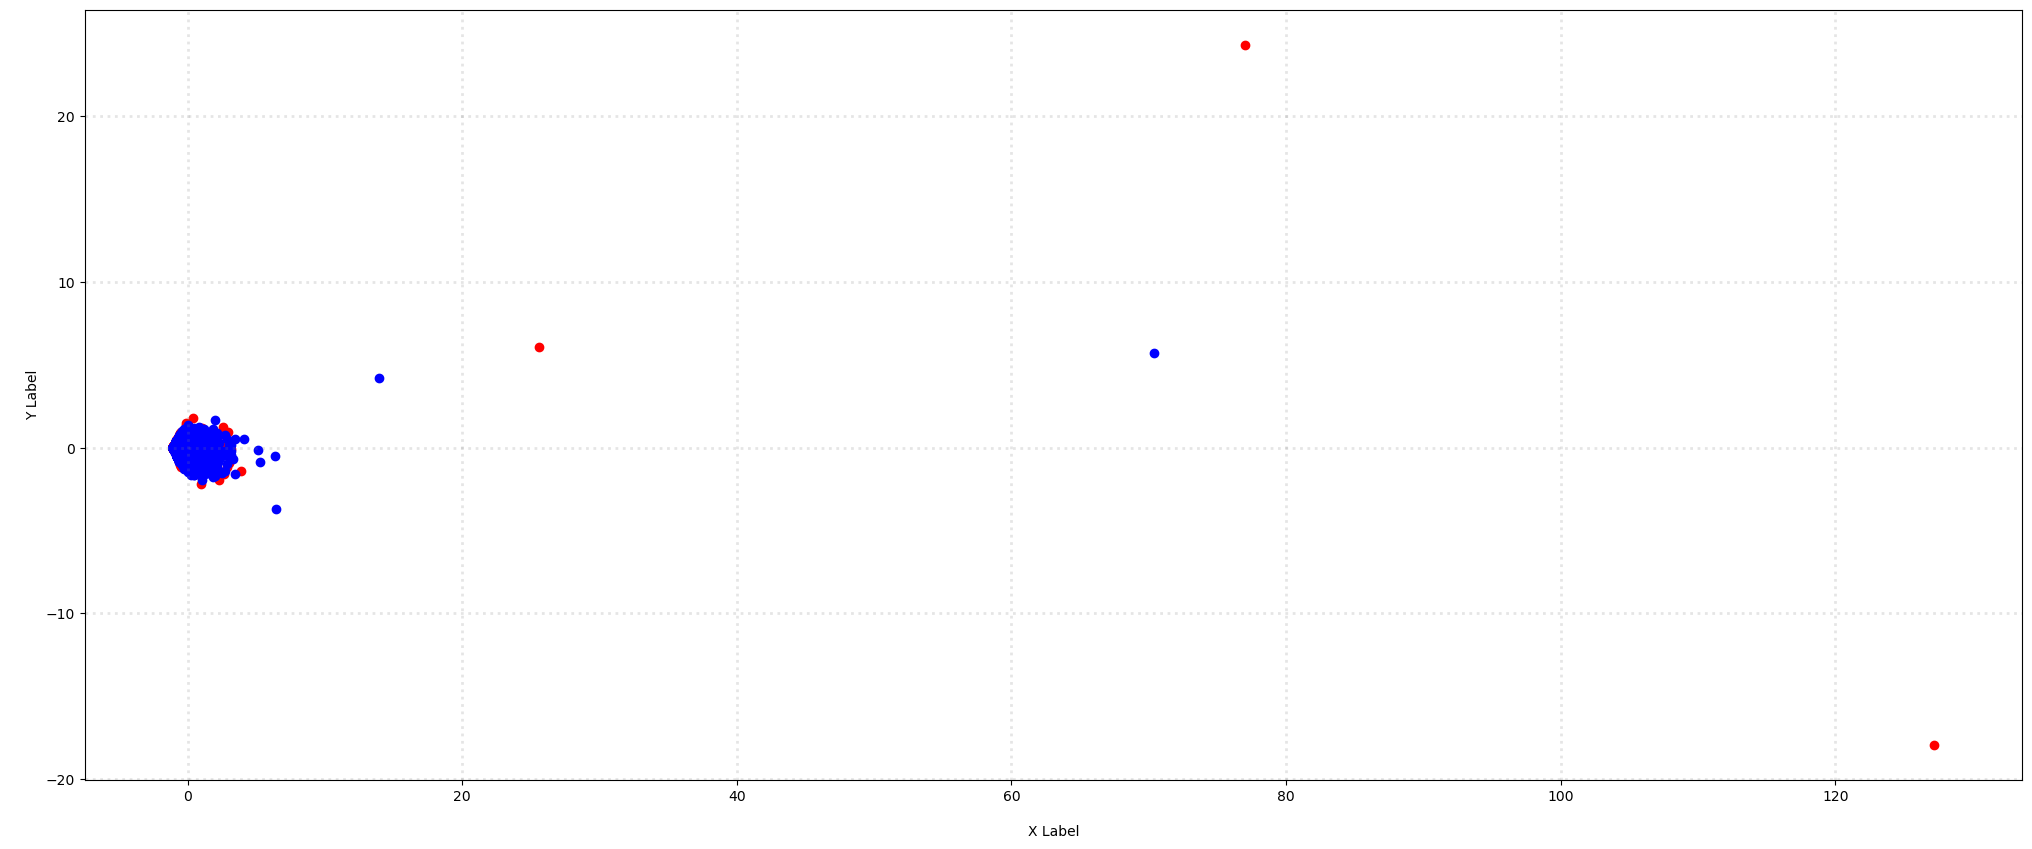

In [200]:
col = ['red', 'blue']
reviews = ["bad" , "good"]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, review in zip(col, reviews):
    xs = data_reduced[data['review'] == review].T[0]
    ys = data_reduced[data['review'] == review].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

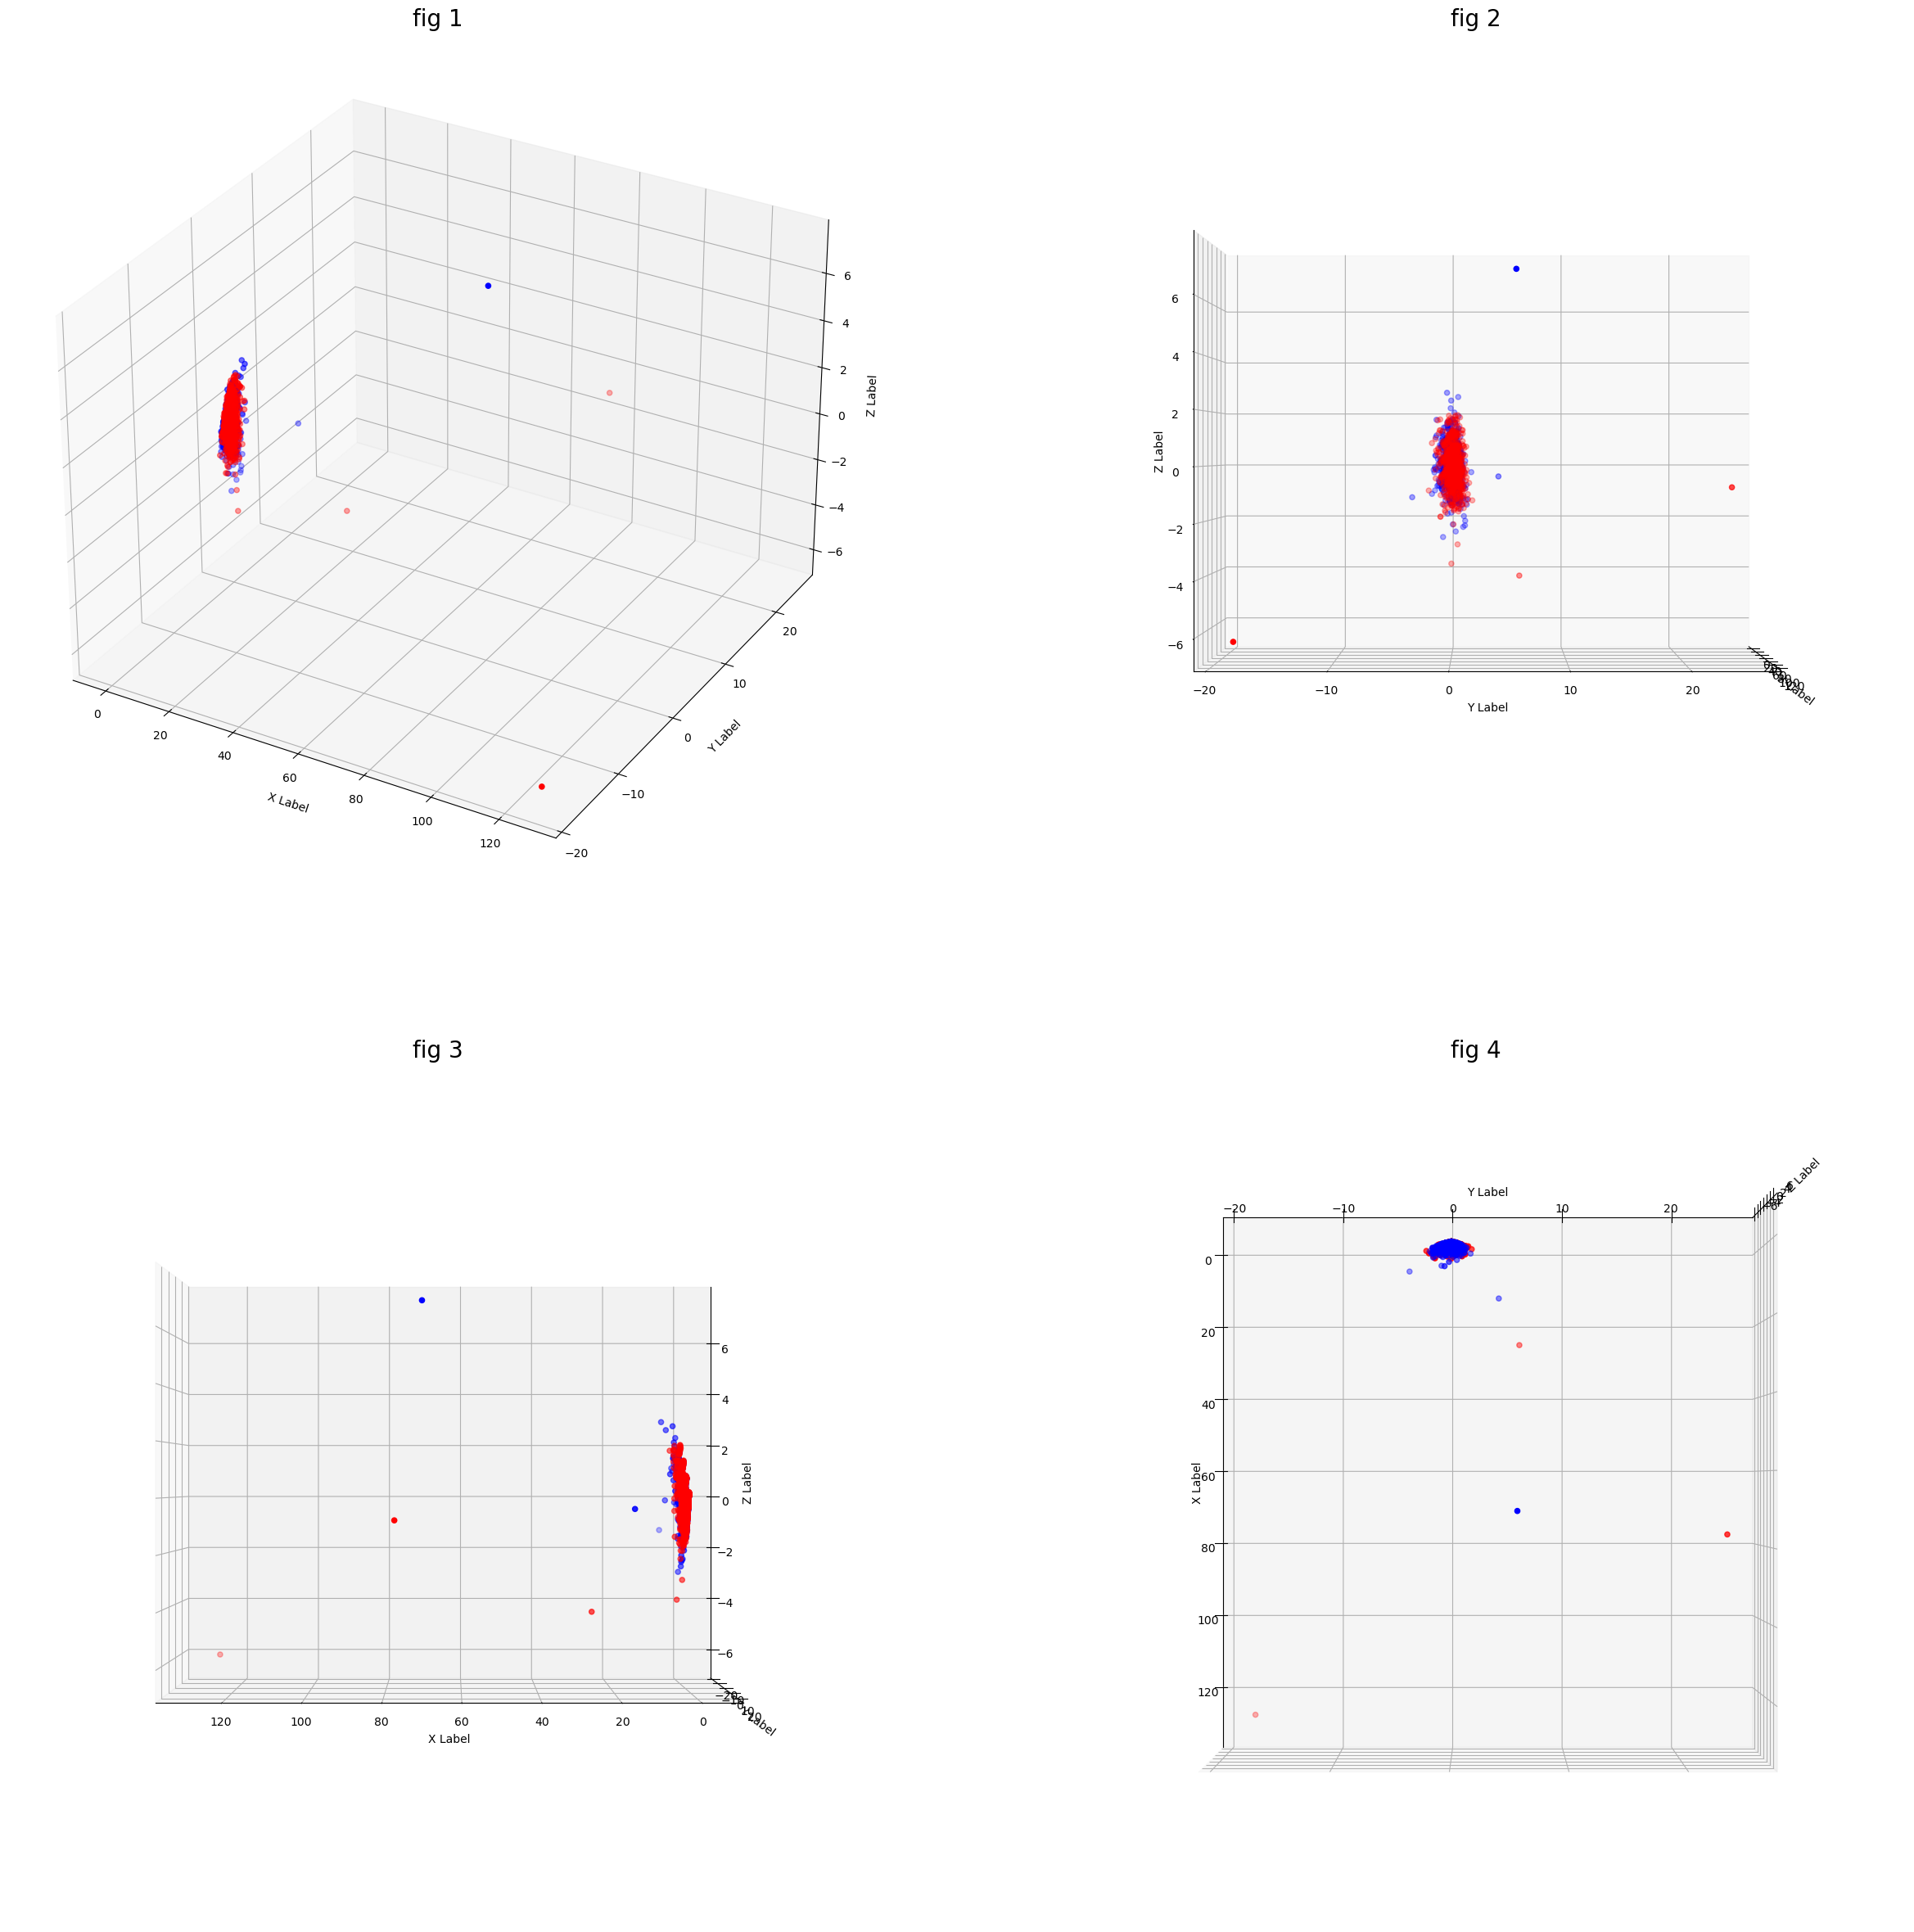

In [201]:
col = ['red', 'blue']
reviews = ["bad" , "good"]
data_reduced_3D = PCA(n_components = 3).fit_transform(data_counts.toarray())
# plot

fig = plt.figure(figsize=(30, 30))
ax1 = plt.subplot(221, projection='3d')
ax2 = plt.subplot(222, projection='3d')
ax3 = plt.subplot(223, projection='3d')
ax4 = plt.subplot(224, projection='3d')


for c, review in zip(col, reviews):
    xs = data_reduced_3D[data['review'] == review].T[0]
    ys = data_reduced_3D[data['review'] == review].T[1]
    zs = data_reduced_3D[data['review'] == review].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    ax4.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.set_title('fig 1', fontsize=20)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.set_title('fig 2', fontsize=20)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.set_title('fig 3', fontsize=20)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.set_title('fig 4', fontsize=20)

ax2.view_init(elev=0,azim=0)
ax3.view_init(elev=0,azim=90)
ax4.view_init(elev=90,azim=0)


#ax.view_init(elev=30, azim=45, roll=15)

plt.show()

In [202]:
## most of the data's the x value is close to zero
##other than this, there seems to be no clear distinction bewteen these two classes
##maybe increasing the dimension of PCA wolud give better results. 

In [203]:
#5.5 Attribute Transformation / Aggregation

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5155


In [204]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [205]:
term_frequencies[0] #sum of first term: 00

1

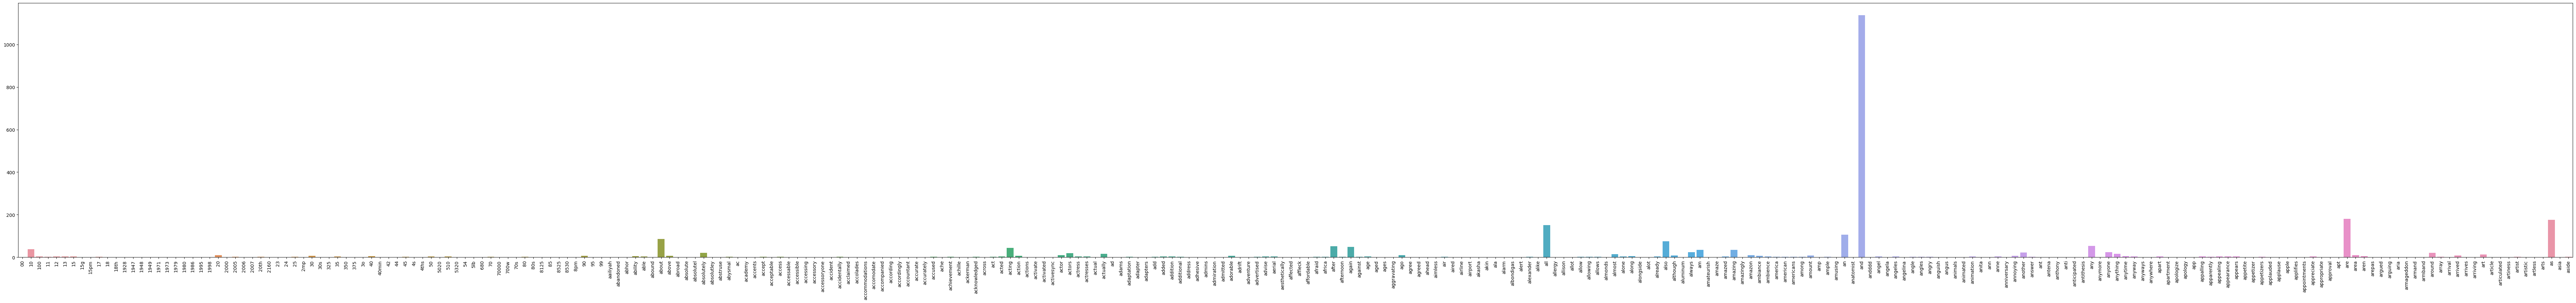

In [206]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [207]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [208]:
# Answer here
reduced_feature_names = count_vect.get_feature_names_out()[:300]
reduced_feature_frequencies = term_frequencies[:300]

indexToDelete = []

#remove word tokens that only appears less then five times 

for i in range(len(count_vect.get_feature_names_out()[:300])):
    if(reduced_feature_frequencies[i] < 5):
        indexToDelete.append(i)

reduced_feature_names = np.delete(reduced_feature_names, indexToDelete)
reduced_feature_frequencies = np.delete(reduced_feature_frequencies, indexToDelete)


fig = px.bar(x=reduced_feature_names, y=reduced_feature_frequencies)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [209]:
# Answer here

freq_word = zip(term_frequencies[:300].tolist(),count_vect.get_feature_names_out()[:300].tolist())
freq_word = sorted(freq_word, reverse= True)
fig = px.bar(x=[word for _,word in freq_word] , y=[freq for freq,_ in freq_word])
fig.show()


In [210]:
##apply log function to the term_frequencie and plot

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


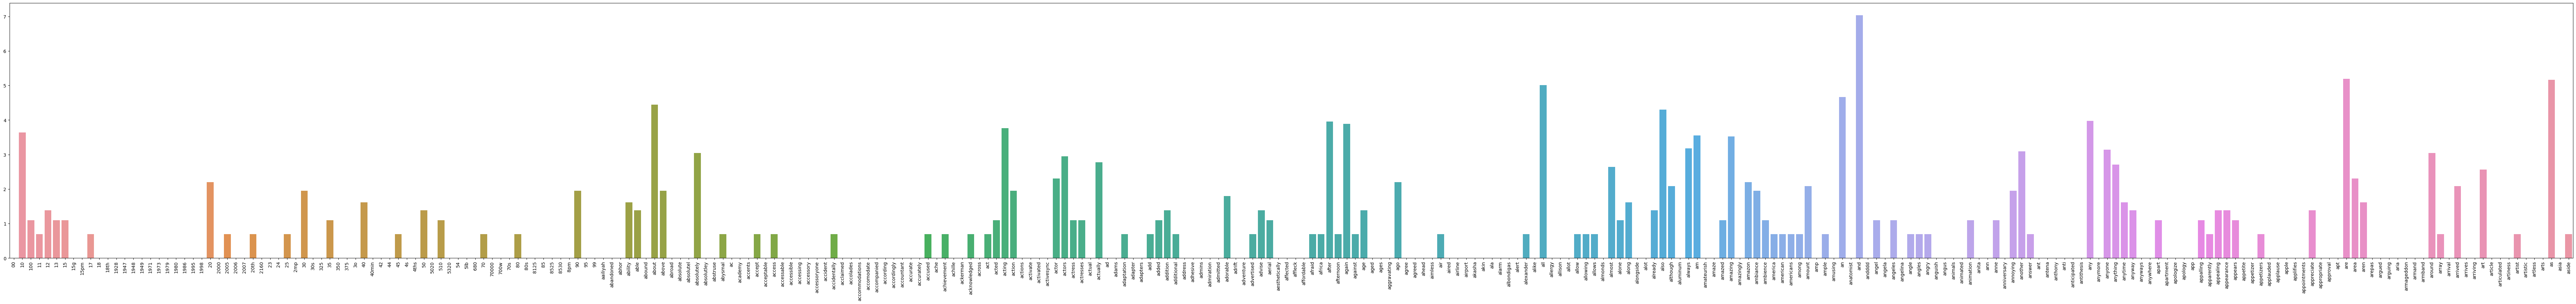

In [211]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [212]:
### 5.6 Discretization and Binarization

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.review)

LabelBinarizer()

In [213]:
data['bin_review'] = mlb.transform(data['review']).tolist()

In [214]:
data[0:9]

,text,score,review,unigrams,bin_review
0,Wow... Loved this place.,1,good,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,bad,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,bad,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,good,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,good,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,bad,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,bad,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,bad,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,good,"[The, fries, were, great, too, .]",[1]


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [215]:
## the only left arrtibute is score , but it is already a binary value, 
##so there's no need for further binarization

# 6. Data Exploration

In [216]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [217]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.']
['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!']
['My fiancé and I came in the middle of the day and we were greeted and seated right away.']


In [218]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [219]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.281718
Cosine Similarity using count bw 1 and 3: 0.465475
Cosine Similarity using count bw 2 and 3: 0.332875
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/hd/kcs86wyx293cm01dd86rq0d40000gn/T/ipykernel_69343/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/hd/kcs86wyx293cm01dd86rq0d40000gn/T/ipykernel_69343/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/hd/kcs86wyx293cm01dd86rq0d40000gn/T/ipykernel_69343/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/hd/kcs86wyx293cm01dd86rq0d40000gn/T/ipykernel_69343/452772485.py:17: Dep

# Part 3 Additional steps on new dataset

## some more data visualization

review
good    1386
bad     1362
Name: count, dtype: int64


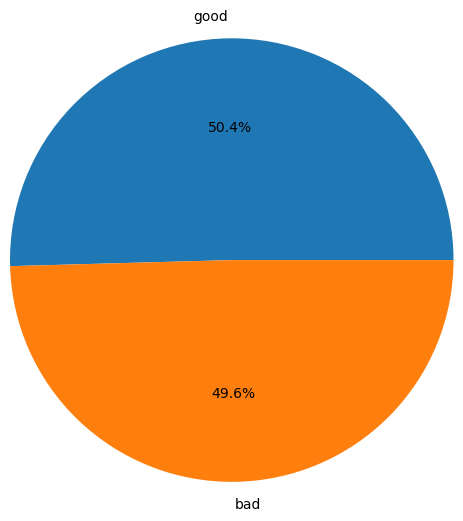

In [220]:
import matplotlib.pyplot as plt
print(data["review"].value_counts())
plt.pie(data["review"].value_counts(), radius=1.5, labels=['good', 'bad'],autopct='%.1f%%')
plt.show()

this is a pie chart of the score in the dataset, we can see that there's no data imbalance problem present.

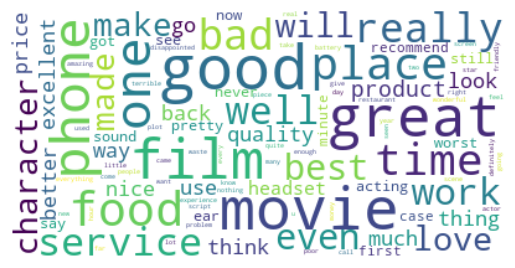

In [222]:
from wordcloud import WordCloud
all_text = ""

for i in range(len(data)):
    all_text += data.iloc[i,0]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

a word cloud graph is a good way to visualize text data. as we can see, the more frquently a word appeared, the larger it is on this graph

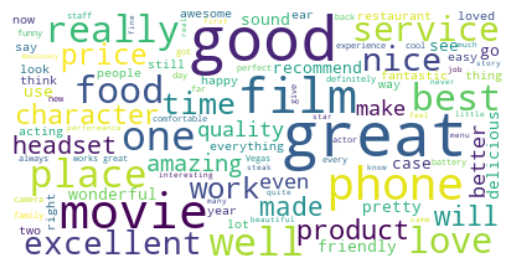

In [223]:
good_text = ""

for i in range(len(data)):
    if(data.iloc[i,1]):
        good_text += data.iloc[i,0]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(good_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

the above figure is a world could on the good reviewed texts, we can see that the most frquent words are 'good', 'great' and 'movie' 

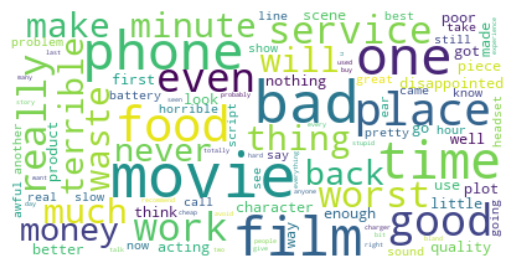

In [224]:
bad_text = ""

for i in range(len(data)):
    if(not data.iloc[i,1]):
        bad_text += data.iloc[i,0]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(bad_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

this is word cloud on bad reviews, we can see that bad isn't the most frequent word used, maybe people who criticized the film often do it in a implied way. 

In [227]:
##add a column of text length

def getLen(text):
    return len(text.split(" "))

data["length"] = data.text.apply(lambda r: getLen(r))

data[:10]

,text,score,review,unigrams,bin_review,length
0,Wow... Loved this place.,1,good,"[Wow, ..., Loved, this, place, .]",[1],4
1,Crust is not good.,0,bad,"[Crust, is, not, good, .]",[0],4
2,Not tasty and the texture was just nasty.,0,bad,"[Not, tasty, and, the, texture, was, just, nas...",[0],8
3,Stopped by during the late May bank holiday of...,1,good,"[Stopped, by, during, the, late, May, bank, ho...",[1],15
4,The selection on the menu was great and so wer...,1,good,"[The, selection, on, the, menu, was, great, an...",[1],12
5,Now I am getting angry and I want my damn pho.,0,bad,"[Now, I, am, getting, angry, and, I, want, my,...",[0],11
6,Honeslty it didn't taste THAT fresh.),0,bad,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0],6
7,The potatoes were like rubber and you could te...,0,bad,"[The, potatoes, were, like, rubber, and, you, ...",[0],22
8,The fries were great too.,1,good,"[The, fries, were, great, too, .]",[1],5
9,A great touch.,1,good,"[A, great, touch, .]",[1],3


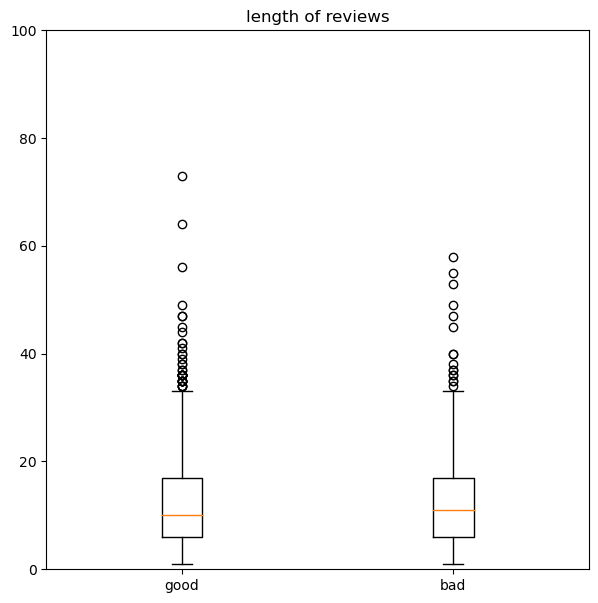

In [240]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)

ax1.boxplot([data[data['score'] == 1]["length"],data[data['score'] == 0]["length"]],labels=["good","bad"])
ax1.set_title("length of reviews")
ax1.set_ylim([0,100])
plt.show()

this is a analysis on comment length and there review score, we cane see that there's no major distribution differences between good and bad reviews

In [109]:
## generating TFIDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

data_tfidf_count = tfidf_vectorizer.fit_transform(data["text"]).toarray()

data_tfidf_count


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
#constructing baysian classifier for count vectorized data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score


X_train, X_test, y_train, y_test = train_test_split(data_counts, data["score"], test_size = 0.20, random_state = 0)

mnb_cv=MultinomialNB()
mnb_cv.fit(X_train,y_train)

y_pred_mnb=mnb_cv.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_pred_mnb,y_test).ravel()


Precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Print the results
print("Count Vectorizer results")
print("accuracy score:",accuracy_score(y_pred_mnb,y_test))
print(confusion_matrix(y_pred_mnb,y_test))
print("Precision:",Precision)
print("recall:", recall)



Count Vectorizer results
accuracy score: 0.7909090909090909
[[228  64]
 [ 51 207]]
Precision: 0.7638376383763837
recall: 0.8023255813953488


In [111]:
#constructing baysian classifier for TF-IDF data

X_train, X_test, y_train, y_test = train_test_split(data_tfidf_count, data["score"], test_size = 0.20, random_state = 0)

mnb_cv=MultinomialNB()
mnb_cv.fit(X_train,y_train)

y_pred_mnb=mnb_cv.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_pred_mnb,y_test).ravel()


Precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Print the results
print("TF-IDF results")
print("accuracy score:",accuracy_score(y_pred_mnb,y_test))
print(confusion_matrix(y_pred_mnb,y_test))
print("Precision:",Precision)
print("recall:", recall)


TF-IDF results
accuracy score: 0.8181818181818182
[[226  47]
 [ 53 224]]
Precision: 0.8265682656826568
recall: 0.8086642599277978


form the tests above, we can see that tfidf has better results in all measures on this task with this dataset
this makes sense because the tfidf value of a token is reduced when it appeared in a lot of documents
this acts as a way of finding important words in a document and discriminatng on words that appeared in too much documents
so that the true meaning of a document is concentrated. making it better than simply counting the frquencies of tokens.  


# Part 4 comments on the lab

In section 3, where we were converting the data into a dataframe, the main dataframe(X) holds two attributes that has the same meaning, namely [category] and [category_name], one of those attributes is redundant.

In section 5.2 when we created an attribute called [unigrams], the results were not used in any of the following steps, creating yet another redundant attributes

In section 5.3 after using the count vectorizer on the texts, there were no further analysis on the tokenized words, there might be some meaningless tokens such as peroids, commas, numbers these tokens should be picked out before performing further steps for more meaningful results.

also in section 5.3 due the reasons above, and the fact that count_vectorizer sort the tokens, in the heat map, the first 300 tokens are mostly number gibberish that only appeared once, resutling in a very sparse matrix and a heat map with mostly empty spaces

with the same problem still existing, the bar plots in sec5.5 is also very sparse.